In [1]:
import uproot
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import mplhep
plt.style.use(mplhep.style.LHCb2)
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import auc, roc_curve
from sklearn.model_selection import KFold
from xgboost import XGBClassifier
import pickle
from scipy.stats import norm
import ROOT
import matplotlib.ticker as mtick


Welcome to JupyROOT 6.26/00


# Load data

In [2]:
df = pd.read_pickle("/mnt/ssd/users/wenjiewu/flare_data/g4sim_ana_data/20221202_genie_v306_evt30000/features_geniev306_trueDirection.pkl")  

# population of final state particles
* prongType
    * 0 - final state lepton
    * 1 - original primary particle
    * 2 - decay products of the short lived final state lepton (namely tau-, could also be a michel electron from muon decay)
    * 3 - decay products of the primary pizero (dominantely 2gamma)
    * 4 - decay prodcuts of the tau decay pizero

In [15]:
values, counts = np.unique(df.query('nuPDG==14 and nuIntType==2 and (prongType==0 or prongType==1)')['primaryTrackPDG'].to_numpy(), return_counts=True)

print([(_, '{:.2f}%'.format(x/np.sum(counts)*100)) for _, x in sorted(zip(values, counts), key=lambda pair: pair[1], reverse=True)[0:10]])

[(211, '19.50%'), (111, '18.76%'), (-211, '15.48%'), (2212, '14.20%'), (2112, '13.13%'), (13, '6.58%'), (22, '3.90%'), (321, '1.82%'), (-321, '1.45%'), (311, '1.40%')]


# Momentum distribution

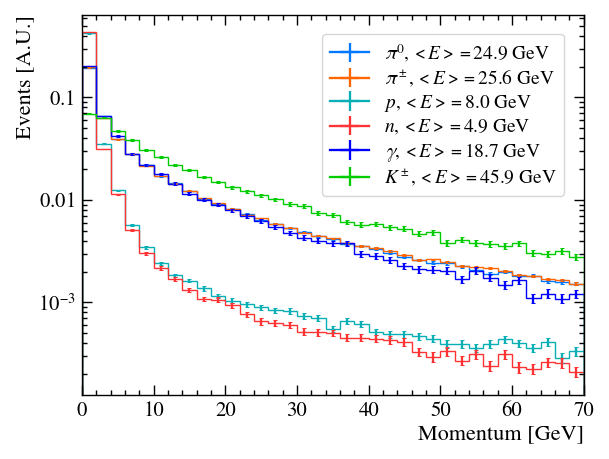

In [74]:
plt.figure(dpi=50)
momentum_range=[0, 70]
num_bins=35
h_pi0, bins = np.histogram(df.query('(prongType==0 or prongType==1) and primaryTrackPDG==111')['TrueP']/1000, bins=num_bins, range=momentum_range)
mean_pi0 = np.mean(df.query('(prongType==0 or prongType==1) and primaryTrackPDG==111')['TrueP']/1000)
h_pion, bins = np.histogram(df.query('(prongType==0 or prongType==1) and (primaryTrackPDG==211 or primaryTrackPDG==-211)')['TrueP']/1000, bins=bins)
mean_pion = np.mean(df.query('(prongType==0 or prongType==1) and (primaryTrackPDG==211 or primaryTrackPDG==-211)')['TrueP']/1000)
h_proton, bins = np.histogram(df.query('(prongType==0 or prongType==1) and primaryTrackPDG==2212')['TrueP']/1000, bins=bins)
mean_proton = np.mean(df.query('(prongType==0 or prongType==1) and primaryTrackPDG==2212')['TrueP']/1000)
h_neutron, bins = np.histogram(df.query('(prongType==0 or prongType==1) and primaryTrackPDG==2112')['TrueP']/1000, bins=bins)
mean_neutron = np.mean(df.query('(prongType==0 or prongType==1) and primaryTrackPDG==2112')['TrueP']/1000)
h_gamma, bins = np.histogram(df.query('(prongType==0 or prongType==1) and primaryTrackPDG==22')['TrueP']/1000, bins=bins)
mean_gamma = np.mean(df.query('(prongType==0 or prongType==1) and primaryTrackPDG==22')['TrueP']/1000)
h_kaon, bins = np.histogram(df.query('(prongType==0 or prongType==1) and (primaryTrackPDG==321 or primaryTrackPDG==-321)')['TrueP']/1000, bins=bins)
mean_kaon = np.mean(df.query('(prongType==0 or prongType==1) and (primaryTrackPDG==321 or primaryTrackPDG==-321)')['TrueP']/1000)
mplhep.histplot((h_pi0,bins), label=r'$\pi^0, <E>={:.1f}$ GeV'.format(mean_pi0), yerr=True, density=True)
mplhep.histplot((h_pion,bins), label=r'$\pi^\pm, <E>={:.1f}$ GeV'.format(mean_pion), yerr=True, density=True)
mplhep.histplot((h_proton,bins), label=r'$p, <E>={:.1f}$ GeV'.format(mean_proton), yerr=True, density=True)
mplhep.histplot((h_neutron,bins), label=r'$n, <E>={:.1f}$ GeV'.format(mean_neutron), yerr=True, density=True)
mplhep.histplot((h_gamma,bins), label=r'$\gamma, <E>={:.1f}$ GeV'.format(mean_gamma), yerr=True, density=True)
mplhep.histplot((h_kaon,bins), label=r'$K^\pm, <E>={:.1f}$ GeV'.format(mean_kaon), yerr=True, density=True)
plt.xlabel('Momentum [GeV]')
plt.ylabel('Events [A.U.]')
plt.xlim(bins[0], bins[-1])
plt.yscale('log')
plt.legend(loc='best', frameon=True)
plt.gcf().savefig('../../P_fs.png')
plt.gcf().savefig('../../P_fs.pdf')
plt.show()

In [79]:
np.sqrt(0.134*0.134+25*25) - 0.134

24.866359117420693